In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import datashader as ds
from datashader.colors import Elevation
from datashader.transfer_functions import shade, stack, dynspread, set_background

/home/fahmi/research/thesis/.venv/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Load Shapefile

In [4]:
df_geom = gpd.read_file("../dataset/africa/shp/grid-sea-africa-zoned.shp")
df_geom = df_geom[["geometry"]]
df_geom["ZONE_ID"] = range(1, len(df_geom) + 1)
df_geom.head()

,geometry,ZONE_ID
0,"MULTIPOLYGON (((18.91476 -34.36368, 18.89379 -...",1
1,"POLYGON ((18.80851 -34.36368, 18.81972 -34.378...",2
2,"POLYGON ((18.91476 -34.66368, 18.91476 -34.963...",3
3,"POLYGON ((18.91476 -34.96368, 18.91476 -35.263...",4
4,"POLYGON ((18.91476 -35.26368, 18.91476 -35.563...",5


In [5]:
df_geom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  9300 non-null   geometry
 1   ZONE_ID   9300 non-null   int64   
dtypes: geometry(1), int64(1)
memory usage: 145.4 KB


<Axes: >

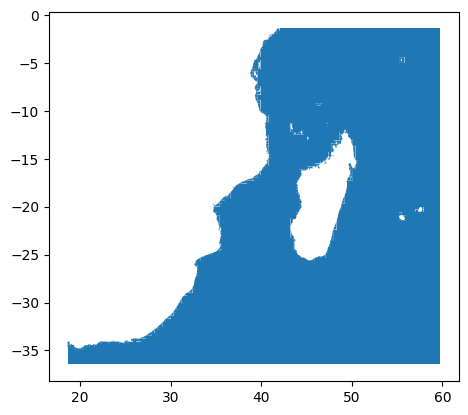

In [15]:
df_geom.plot()

<Axes: >

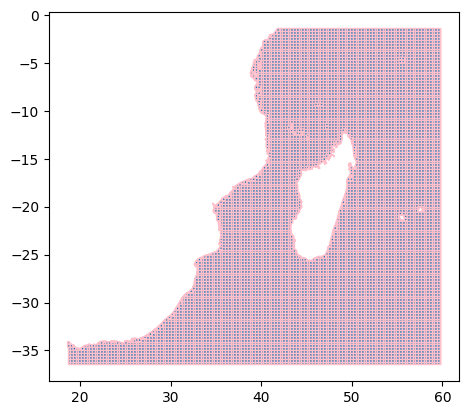

In [25]:
df_geom.plot(edgecolor='pink', linewidth=1)

## Occurence + Zone

In [7]:
df_occ = pd.read_csv("../dataset/combined/occurences.csv", parse_dates=["ts"])
df_occ["ts_date"] = df_occ["ts"].dt.strftime("%Y-%m-%d")
df_occ["ts_mm"] = df_occ["ts"].dt.strftime("%Y-%m")
df_occ.head()

,occurrenceID,ts,latitude,longitude,species,ts_date,ts_mm
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,2023-11-30,2023-11
1,403039,2023-11-21,-21.220602,55.205602,Megaptera novaeangliae,2023-11-21,2023-11
2,405925,2023-11-19,-33.476485,115.064949,Megaptera novaeangliae,2023-11-19,2023-11
3,403038,2023-11-14,-21.235409,55.226194,Megaptera novaeangliae,2023-11-14,2023-11
4,403037,2023-11-13,-21.269454,55.201475,Megaptera novaeangliae,2023-11-13,2023-11


In [8]:
df_occ_points = gpd.GeoDataFrame(df_occ, geometry=gpd.points_from_xy(df_occ["longitude"], df_occ["latitude"]), crs="EPSG:4326")
df_occ_points.head()

,occurrenceID,ts,latitude,longitude,species,ts_date,ts_mm,geometry
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,2023-11-30,2023-11,POINT (46.83744 -25.3636)
1,403039,2023-11-21,-21.220602,55.205602,Megaptera novaeangliae,2023-11-21,2023-11,POINT (55.2056 -21.2206)
2,405925,2023-11-19,-33.476485,115.064949,Megaptera novaeangliae,2023-11-19,2023-11,POINT (115.06495 -33.47648)
3,403038,2023-11-14,-21.235409,55.226194,Megaptera novaeangliae,2023-11-14,2023-11,POINT (55.22619 -21.23541)
4,403037,2023-11-13,-21.269454,55.201475,Megaptera novaeangliae,2023-11-13,2023-11,POINT (55.20148 -21.26945)


In [9]:
df_occ_points[df_occ_points["ts_date"] == "2023-11-30"]

,occurrenceID,ts,latitude,longitude,species,ts_date,ts_mm,geometry
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,2023-11-30,2023-11,POINT (46.83744 -25.3636)


In [10]:
df_occ_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10502 entries, 0 to 10501
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   occurrenceID  10502 non-null  int64         
 1   ts            10502 non-null  datetime64[ns]
 2   latitude      10502 non-null  float64       
 3   longitude     10502 non-null  float64       
 4   species       10502 non-null  object        
 5   ts_date       10502 non-null  object        
 6   ts_mm         10502 non-null  object        
 7   geometry      10502 non-null  geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(1), object(3)
memory usage: 656.5+ KB


<Axes: >

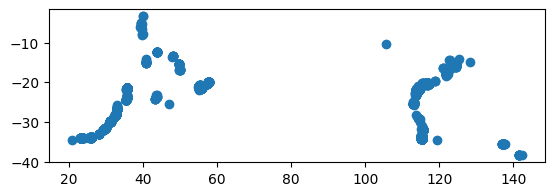

In [16]:
df_occ_points.plot()

<Axes: >

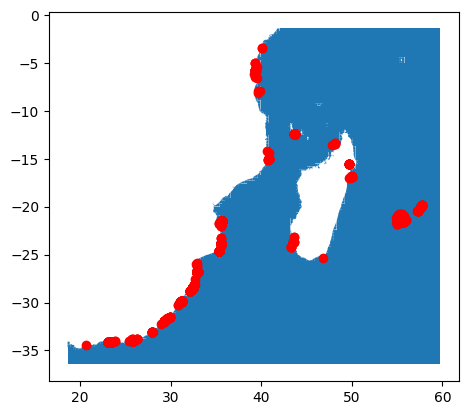

In [21]:
df_occ_vis = df_occ_points[df_occ_points["longitude"] < 60]

base = df_geom.plot()
df_occ_vis.plot(ax=base, color="red")